In [1]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model, Input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet201

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import sklearn.metrics

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
X_val = np.load("256_192_val.npy")
X_test = np.load("256_192_test.npy")
y_val = np.load("val_labels.npy")
y_test = np.load("test_labels.npy")
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
X_val.shape, X_test.shape, y_val.shape, y_test.shape
input_shape = X_val[0,:,:,:].shape
model_input = Input(shape=input_shape)

In [3]:
from tensorflow import keras
import numpy as np 
modelEns=keras.models.load_model('ensemble.h5')

In [4]:
loss_val, acc_val = modelEns.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))
loss_test, acc_test = modelEns.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

29/29 [==============================] - 386s 13s/step - loss: 0.3974 - accuracy: 0.8470
Validation: accuracy = 0.847007  ;  loss_v = 0.397386
32/32 [==============================] - 2204s 14s/step - loss: 0.4350 - accuracy: 0.8503
Test: accuracy = 0.850299  ;  loss = 0.434979


In [5]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(modelEns.predict(X_test),axis=1)


32/32 [==============================] - 438s 13s/step


In [6]:
print('Confusion Matrix')
print(sklearn.metrics.confusion_matrix(y_test_arg, Y_pred))

Confusion Matrix
[[ 10   3  11   0   1   3   0]
 [  1  41   8   0   6   1   0]
 [  1   1  82   0  18   6   0]
 [  2   0   3   6   4   0   0]
 [  0   0  16   0 653   8   1]
 [  0   0  20   0  35  47   0]
 [  0   0   0   1   0   0  13]]


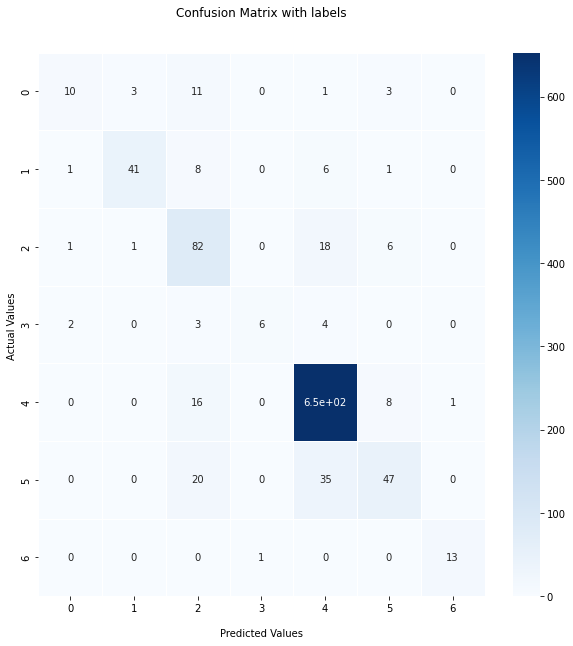

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(sklearn.metrics.confusion_matrix(y_test_arg, Y_pred), annot=True, cmap='Blues', linewidths=.9, ax=ax)
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])
plt.show()

In [8]:
print(sklearn.metrics.classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.36      0.48        28
           1       0.91      0.72      0.80        57
           2       0.59      0.76      0.66       108
           3       0.86      0.40      0.55        15
           4       0.91      0.96      0.94       678
           5       0.72      0.46      0.56       102
           6       0.93      0.93      0.93        14

    accuracy                           0.85      1002
   macro avg       0.80      0.66      0.70      1002
weighted avg       0.85      0.85      0.84      1002



In [9]:
modelvgg=keras.models.load_model('VGG16.h5')

In [10]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(modelvgg.predict(X_test),axis=1)
print('Confusion Matrix')
print(sklearn.metrics.confusion_matrix(y_test_arg, Y_pred))

32/32 [==============================] - 239s 7s/step
Confusion Matrix
[[ 11   7   8   1   0   1   0]
 [  2  36  10   1   5   3   0]
 [  4   1  76   1  16  10   0]
 [  2   1   3   5   4   0   0]
 [  1   4  31   1 616  25   0]
 [  4   0  18   1  28  50   1]
 [  0   0   0   1   1   1  11]]


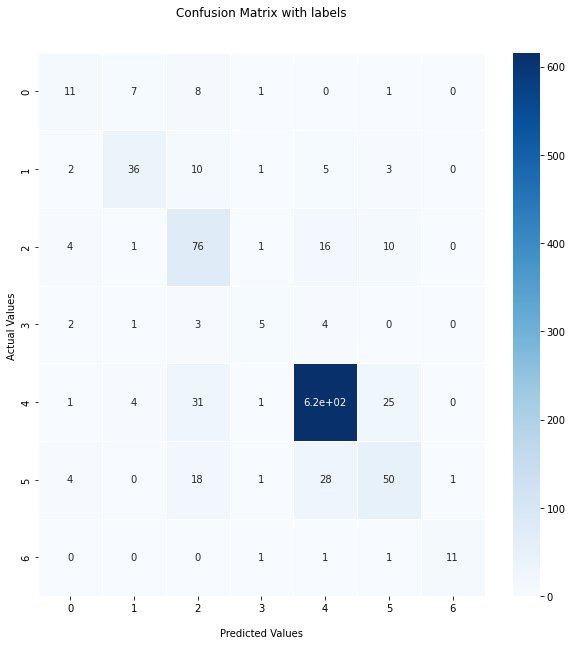

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(sklearn.metrics.confusion_matrix(y_test_arg, Y_pred), annot=True, cmap='Blues', linewidths=.9, ax=ax)
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])
plt.show()

In [12]:
print(sklearn.metrics.classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.46      0.39      0.42        28
           1       0.73      0.63      0.68        57
           2       0.52      0.70      0.60       108
           3       0.45      0.33      0.38        15
           4       0.92      0.91      0.91       678
           5       0.56      0.49      0.52       102
           6       0.92      0.79      0.85        14

    accuracy                           0.80      1002
   macro avg       0.65      0.61      0.62      1002
weighted avg       0.81      0.80      0.80      1002



In [13]:
modelinc=keras.models.load_model('InceptionV3.h5')

In [14]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(modelinc.predict(X_test),axis=1)
print('Confusion Matrix')
print(sklearn.metrics.confusion_matrix(y_test_arg, Y_pred))

32/32 [==============================] - 57s 2s/step
Confusion Matrix
[[ 11   2   9   0   2   4   0]
 [  5  33   9   0   8   2   0]
 [  1   1  72   0  29   5   0]
 [  2   0   3   6   4   0   0]
 [  0   0  21   0 639  17   1]
 [  2   0  22   1  42  35   0]
 [  0   1   0   0   3   0  10]]


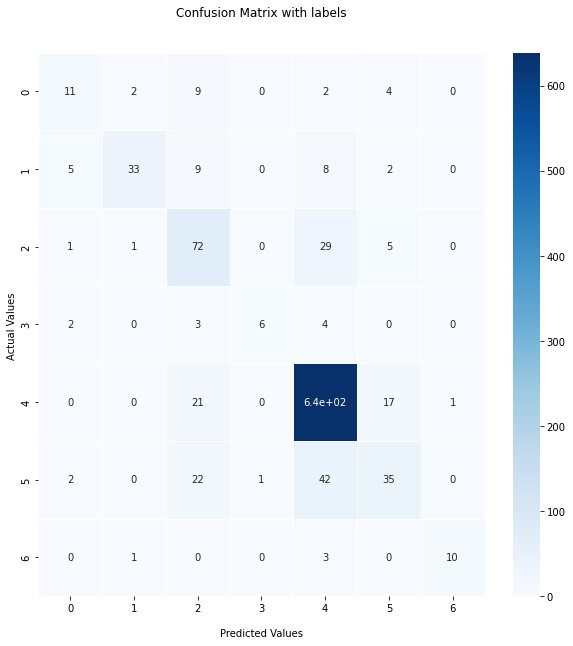

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(sklearn.metrics.confusion_matrix(y_test_arg, Y_pred), annot=True, cmap='Blues', linewidths=.9, ax=ax)
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])
plt.show()

In [16]:
print(sklearn.metrics.classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.39      0.45        28
           1       0.89      0.58      0.70        57
           2       0.53      0.67      0.59       108
           3       0.86      0.40      0.55        15
           4       0.88      0.94      0.91       678
           5       0.56      0.34      0.42       102
           6       0.91      0.71      0.80        14

    accuracy                           0.80      1002
   macro avg       0.74      0.58      0.63      1002
weighted avg       0.80      0.80      0.79      1002



In [17]:
modelden=keras.models.load_model('DenseNet.h5')

In [18]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(modelden.predict(X_test),axis=1)
print('Confusion Matrix')
print(sklearn.metrics.confusion_matrix(y_test_arg, Y_pred))

32/32 [==============================] - 165s 5s/step
Confusion Matrix
[[ 10   4   9   0   0   5   0]
 [  1  41   8   0   5   2   0]
 [  0   4  78   0  12  14   0]
 [  2   1   1   7   2   2   0]
 [  0   2  20   2 628  25   1]
 [  0   2  19   0  28  53   0]
 [  0   0   0   1   0   0  13]]


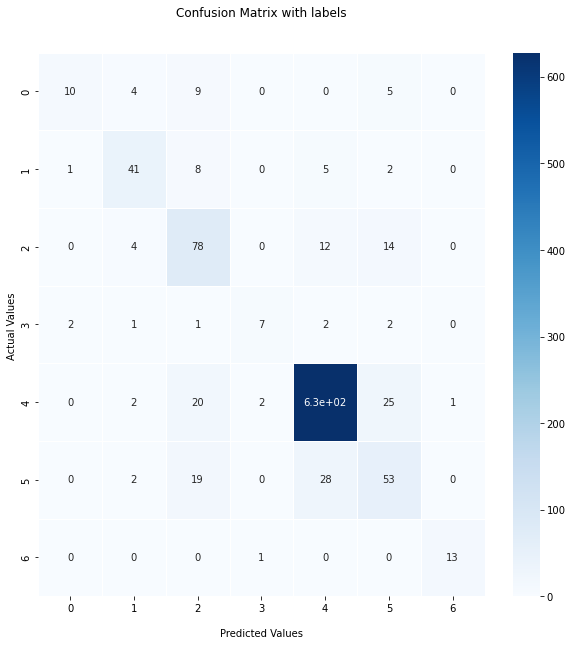

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(sklearn.metrics.confusion_matrix(y_test_arg, Y_pred), annot=True, cmap='Blues', linewidths=.9, ax=ax)
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])
plt.show()

In [20]:
print(sklearn.metrics.classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.36      0.49        28
           1       0.76      0.72      0.74        57
           2       0.58      0.72      0.64       108
           3       0.70      0.47      0.56        15
           4       0.93      0.93      0.93       678
           5       0.52      0.52      0.52       102
           6       0.93      0.93      0.93        14

    accuracy                           0.83      1002
   macro avg       0.74      0.66      0.69      1002
weighted avg       0.83      0.83      0.83      1002



In [1]:
models=['ensemble','vgg16','densenet','inception','basic cnn']
precision=[0.85,0.81,0.83,0.80,0.72]
recall=[0.85,0.80,0.83,0.80,0.75]
accuracy=[0.85,0.80,0.83,0.80,0.75]

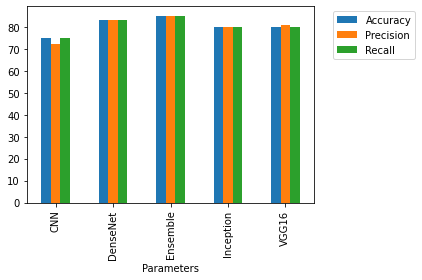

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame([['Ensemble','Precision',precision[0]*100],['Ensemble','Recall',recall[0]*100],['Ensemble','Accuracy',accuracy[0]*100],
                       ['VGG16','Precision',precision[1]*100],['VGG16','Recall',recall[1]*100],['VGG16','Accuracy',accuracy[1]*100],
                       ['DenseNet','Precision',precision[2]*100],['DenseNet','Recall',recall[2]*100],['DenseNet','Accuracy',accuracy[2]*100],  
                   ['Inception','Precision',precision[3]*100],['Inception','Recall',recall[3]*100],['Inception','Accuracy',accuracy[3]*100],
                   ['CNN','Precision',precision[4]*100],['CNN','Recall',recall[4]*100],['CNN','Accuracy',accuracy[4]*100],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()